In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

transactions_fpath = '../data/comscore/2017/transactions.csv'

In [114]:
transactions_df = pd.read_csv(transactions_fpath)
transactions_df.columns

/Users/aberke/projects/CSL_Andorra_COVID_Public/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['machine_id', 'site_session_id', 'prod_category_id', 'prod_name',
       'domain_id', 'prod_qty', 'prod_totprice', 'basket_tot', 'event_date',
       'event_time', 'hoh_most_education', 'census_region', 'household_size',
       'hoh_oldest_age', 'household_income', 'children', 'racial_background',
       'connection_speed', 'country_of_origin', 'zip_code', 'domain_name'],
      dtype='object')

In [115]:
transactions_df = transactions_df[['machine_id', 
                 'household_income', 'racial_background', 
                 'country_of_origin', 'hoh_most_education',
                 'prod_category_id', 'prod_name',
                 'prod_qty', 'prod_totprice', 
                 'event_date',
                 'domain_name']]
transactions_df.drop('machine_id', axis=1).head()

,household_income,racial_background,country_of_origin,hoh_most_education,prod_category_id,prod_name,prod_qty,prod_totprice,event_date,domain_name
0,12,1,1,4,99,Entire home/apt,1.0,NaN,20170224,NaN
1,13,5,0,2,99,Entire home/apt,1.0,NaN,20170316,NaN
2,13,1,0,5,99,Entire home/apt,1.0,NaN,20170216,NaN
3,11,3,1,3,99,Private room,1.0,NaN,20170214,NaN
4,14,2,0,3,99,Entire home/apt,1.0,NaN,20170202,NaN


## Domain names

Most / many domains are unique in the dataset.

In [116]:
print(transactions_df['domain_name'].unique())

[nan 'verizonwireless.com' 'aa.com' 'southwest.com' 'ebay.com'
 'forever21.com' 'checksunlimited.com' 'target.com' 'sears.com'
 'zales.com' 'gap.com' 'bestbuy.com' 'chewy.com' 'visiondirect.com'
 'samsclub.com' 'proflowers.com' 'avenue.com' 'ticketweb.com'
 'tigerdirect.com' 'bhphotovideo.com' 'stubhub.com' 'disneystore.com'
 'norton.com' 'dominos.com' 'kayak.com' 'ticketliquidator.com' 'etsy.com'
 'avis.com' 'tirerack.com' 'vistaprint.com' 'vitacost.com'
 'womanwithin.com' 'peapod.com' 'hsn.com' 'ticketfly.com' 'mcafee.com'
 'dsw.com' 'nordstrom.com' 'rakuten.com' 'ihg.com' 'landsend.com'
 'ticketmaster.com' 'midnightvelvet.com' 'jjill.com' 'united.com'
 'walgreens.com' 'petco.com' 'homedepot.com' 'ups.com' 'zappos.com'
 'costcophotocenter.com' 'eastbay.com' 't-mobile.com' 'hp.com'
 'roamans.com' 'frys.com' 'quill.com' '1800flowers.com' 'kohls.com'
 'blair.com' 'carters.com' 'eddiebauer.com' '1800contacts.com' 'att.com'
 'bathandbodyworks.com' 'nike.com' 'footlocker.com' 'rei.com' 'ep

207 unique domains
transactions per domain


amazon.com            45693
ebay.com              13575
dominos.com            5037
walmart.com            4035
papajohns.com          2294
                      ...  
harryanddavid.com         1
kingsizedirect.com        1
intuit.com                1
weightwatchers.com        1
zales.com                 1
Name: domain_name, Length: 207, dtype: int64

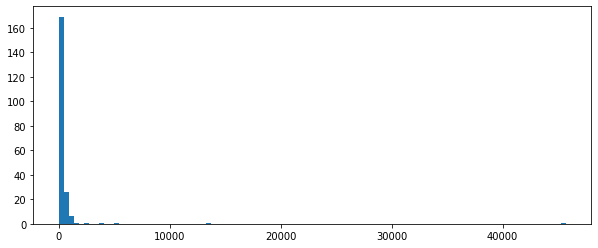

In [117]:
print('%s unique domains' % transactions_df['domain_name'].nunique())
print('transactions per domain')
fig,ax = plt.subplots(1,1, figsize=(10,4))
_ = ax.hist(transactions_df['domain_name'].value_counts().values, bins=100)
transactions_df['domain_name'].value_counts()

In [128]:
# What are the most popular domains?
D = 20
print('total transactions per domain -- %s most popular' % D)
transactions_df['domain_name'].value_counts().head(D)

total transactions per domain -- 20 most popular


amazon.com             45693
ebay.com               13575
dominos.com             5037
walmart.com             4035
papajohns.com           2294
kohls.com               1760
amway.com               1237
vistaprint.com          1228
jcpenney.com            1209
etsy.com                1138
aa.com                  1138
gap.com                  992
target.com               904
expedia.com              888
jetblue.com              883
victoriassecret.com      858
melaleuca.com            852
southwest.com            780
childrensplace.com       745
safeway.com              737
Name: domain_name, dtype: int64

In [129]:
# How many people / machine IDs per domain?
# note how ebay changes in order!
machines_per_domain = (
    transactions_df.groupby(['domain_name'])['machine_id']
    .nunique().sort_values(ascending=False)
)
machines_per_domain.head(D)

domain_name
amazon.com            9447
ebay.com              3059
walmart.com           1279
dominos.com           1261
papajohns.com          900
expedia.com            564
southwest.com          530
etsy.com               464
eventbrite.com         408
vistaprint.com         405
booking.com            400
walgreens.com          380
kohls.com              362
microsoftstore.com     332
groupon.com            329
jcpenney.com           319
aa.com                 306
target.com             298
hotels.com             296
norton.com             279
Name: machine_id, dtype: int64

machines per domain


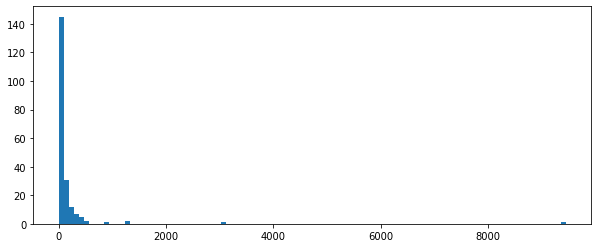

In [130]:
print('machines per domain')
fig,ax = plt.subplots(1,1, figsize=(10,4))
_ = ax.hist(machines_per_domain.values, bins=100)

0 amazon.com
domain amazon.com
186 unique product categories
41751 unique product names
transactions per product category ID


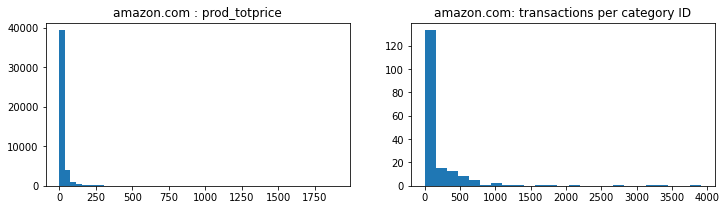

1 ebay.com
domain ebay.com
127 unique product categories
13376 unique product names
transactions per product category ID


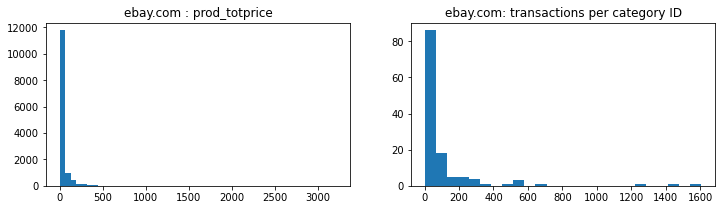

2 walmart.com
domain walmart.com
177 unique product categories
3422 unique product names
transactions per product category ID


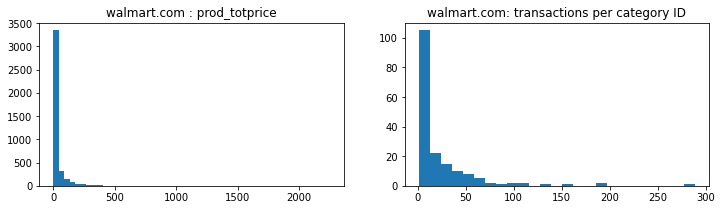

3 dominos.com
domain dominos.com
1 unique product categories
9 unique product names
transactions per product category ID


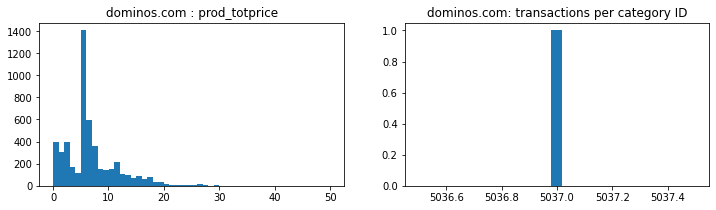

4 papajohns.com
domain papajohns.com
1 unique product categories
154 unique product names
transactions per product category ID


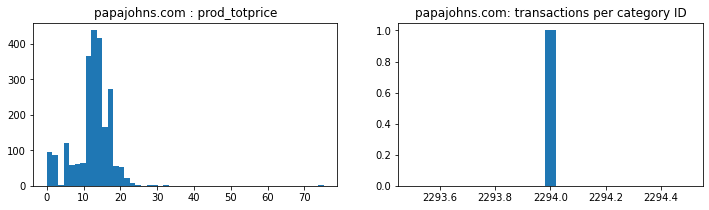

5 expedia.com
domain expedia.com
5 unique product categories
550 unique product names
transactions per product category ID


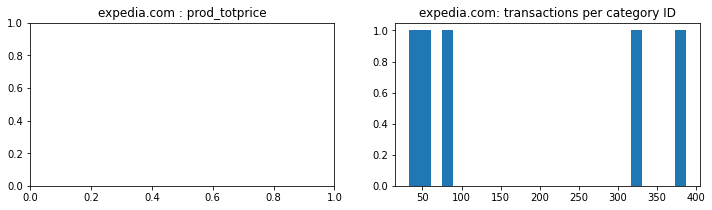

6 southwest.com
domain southwest.com
2 unique product categories
6 unique product names
transactions per product category ID


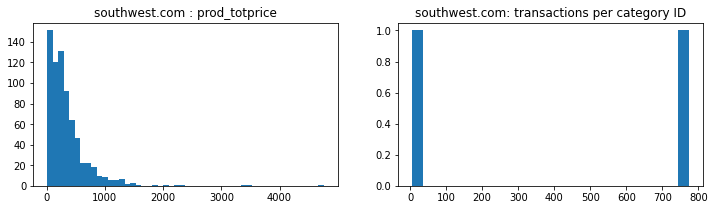

7 etsy.com
domain etsy.com
57 unique product categories
1061 unique product names
transactions per product category ID


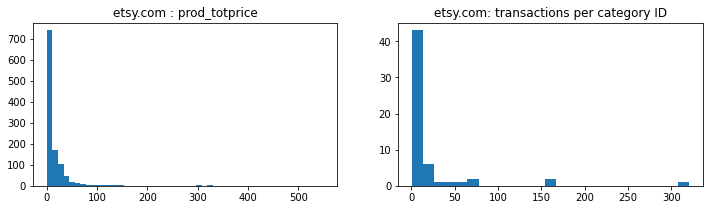

8 eventbrite.com
domain eventbrite.com
2 unique product categories
544 unique product names
transactions per product category ID


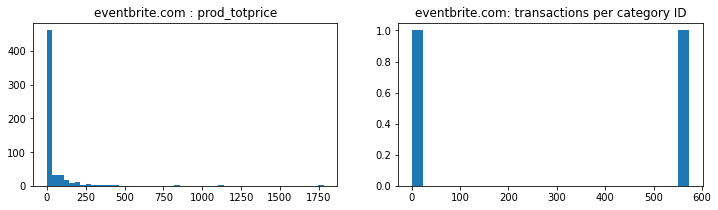

9 vistaprint.com
domain vistaprint.com
21 unique product categories
152 unique product names
transactions per product category ID


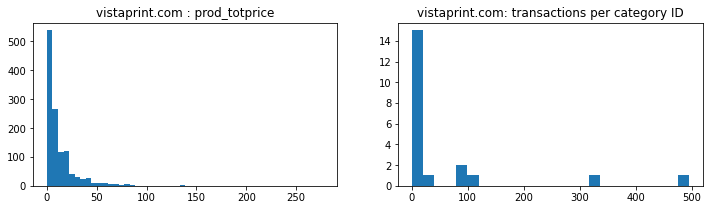

10 booking.com
domain booking.com
1 unique product categories
1 unique product names
transactions per product category ID


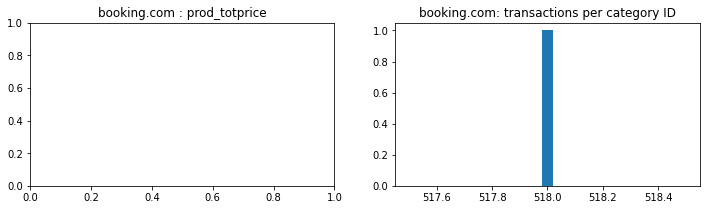

11 walgreens.com
domain walgreens.com
18 unique product categories
99 unique product names
transactions per product category ID


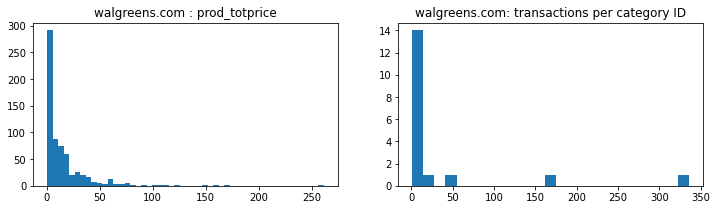

12 kohls.com
domain kohls.com
65 unique product categories
1698 unique product names
transactions per product category ID


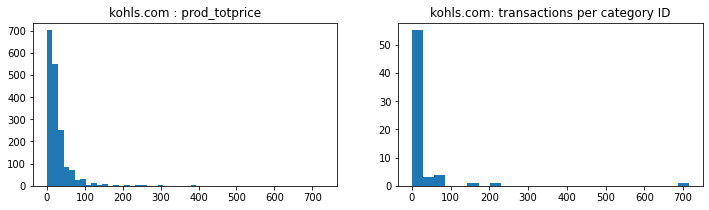

13 microsoftstore.com
domain microsoftstore.com
8 unique product categories
22 unique product names
transactions per product category ID


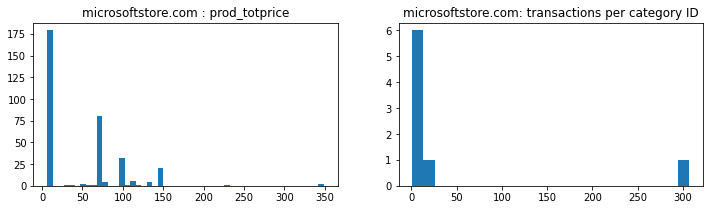

14 groupon.com
domain groupon.com
2 unique product categories
495 unique product names
transactions per product category ID


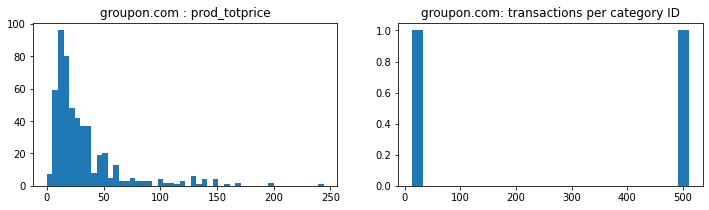

15 jcpenney.com
domain jcpenney.com
31 unique product categories
1150 unique product names
transactions per product category ID


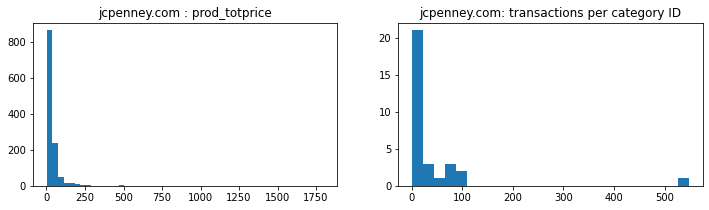

16 aa.com
domain aa.com
2 unique product categories
1067 unique product names
transactions per product category ID


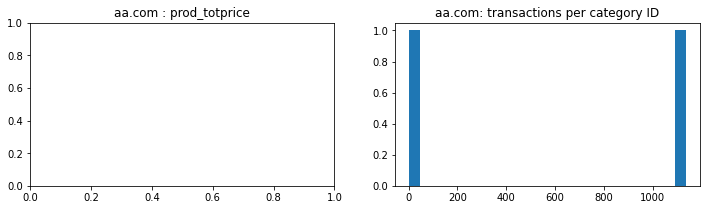

17 target.com
domain target.com
90 unique product categories
866 unique product names
transactions per product category ID


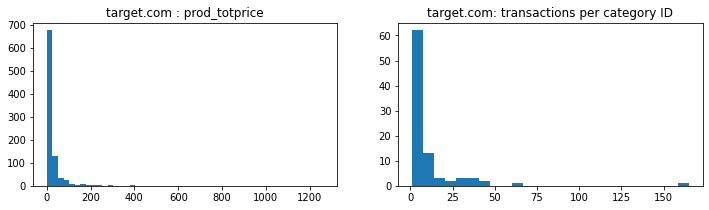

18 hotels.com
domain hotels.com
1 unique product categories
170 unique product names
transactions per product category ID


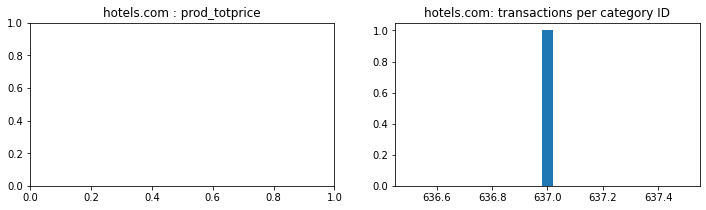

19 norton.com
domain norton.com
1 unique product categories
17 unique product names
transactions per product category ID


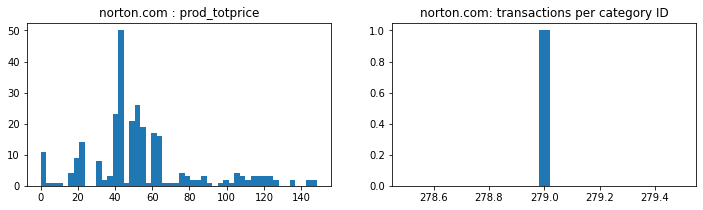

In [132]:
# Specifics per domain

# for the top D domains...
for i, domain in enumerate(machines_per_domain.index[:D]):
    print(i, domain)
    d_transactions = transactions_df[transactions_df.domain_name==domain]
    fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,3))
    print('domain', domain)
    print('%s unique product categories'%d_transactions['prod_category_id'].nunique())
    print('%s unique product names'%d_transactions['prod_name'].nunique())
    if (d_transactions['prod_totprice'].nunique() > 1):
        _ = ax1.hist(d_transactions['prod_totprice'], bins=50)
    ax1.set_title('%s : prod_totprice' % domain)
    print('transactions per product category ID')
    _ = ax2.hist(d_transactions['prod_category_id'].value_counts(), bins=25)
    ax2.set_title('%s: transactions per category ID' % domain)
    plt.show()

## Products and prices

- What is the distribution of prices per product?

- How many machines and transactions per product?

In [ ]:
# What is the distribution of prices per product?

# How many machines and transactions per product?

## Transactions per machine

In [24]:
print('%s unique machine ids'%transactions_df['machine_id'].nunique())
print('transactions per machine id:')
print(transactions_df['machine_id'].value_counts().rename('transactions').to_frame()['transactions'].describe())
transaction_per_machine_id = transactions_df['machine_id'].value_counts().values
transaction_per_machine_id.sort()
transaction_per_machine_id

19282 unique machine ids
transactions per machine id:
count    19282.000000
mean         5.970750
std         14.048549
min          1.000000
25%          1.000000
50%          3.000000
75%          6.000000
max       1311.000000
Name: transactions, dtype: float64


array([   1,    1,    1, ...,  240,  415, 1311])

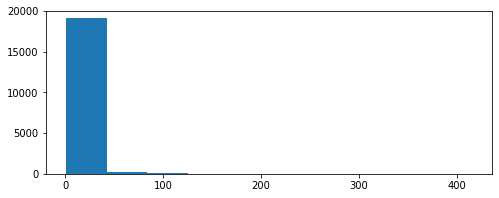

In [34]:
# plot without that crazy outlier
fig, ax = plt.subplots(1,1,figsize=(8,3))
_ = ax.hist(transaction_per_machine_id[:-1])

In [7]:
transactions_df['domain_name'].nunique()

207